In [ ]:
   from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import string
from sklearn.metrics.pairwise import cosine_similarit
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Minor Project/Final_create_dataset_for_bengali/Final_dataset.csv')
#data = data.head(324)# A6 completes in 204 row # ! based indexing
#tweet = data['tweet_text']
#label = data['labels_value']
#ids = data['id']
#ids
idx=data['Article_number']
article_number = data['Article_number']
sentence_number = data['Sentence_number']
sentence = data['Sentence']
label = data['Label']
sentence_embedding = data['sentence_embedding']


In [ ]:
sentence_embedding

0      [-6.31356495e-04  3.91298207e-04  1.61845994e-...
1      [-4.83550801e-04 -2.98804429e-04 -1.35067516e-...
2      [ 1.1581162e-03  6.6569226e-04  2.4635314e-03 ...
3      [-1.6089833e-03 -4.8101065e-05  2.1922325e-03 ...
4      [-4.0632693e-04  3.0558745e-03  3.2430096e-03 ...
                             ...                        
319    [-9.63557221e-04 -5.25761046e-04  1.33135088e-...
320    [-0.00130558  0.00164898 -0.00029906 -0.002987...
321    [ 2.0518587e-03  4.7035241e-03  8.9280709e-04 ...
322    [ 1.43417390e-03  2.47004302e-03 -1.98182417e-...
323    [-0.00122102 -0.00095307  0.00328747  0.006489...
Name: sentence_embedding, Length: 324, dtype: object

In [ ]:
article_number

0      0
1      0
2      0
3      0
4      0
      ..
319    9
320    9
321    9
322    9
323    9
Name: Article_number, Length: 324, dtype: int64

In [ ]:
data

,id,Article_number,Sentence_number,Sentence,Label,sentence_embedding
0,0,0,S1,শ্রীহরিকোটা: ভারতের মহাকাশ বিজ্ঞানে আজ এক দার...,0,[-6.31356495e-04 3.91298207e-04 1.61845994e-...
1,1,0,S2,রোভার এবং একটি প্রোপালশন মডিউল রয়ছে৷ যার ওজন ...,1,[-4.83550801e-04 -2.98804429e-04 -1.35067516e-...
2,2,0,S3,আবহাওয়ার বড় তোলপাড়ের ইঙ্গিত কি%%%%%%%%রোভার...,1,[ 1.1581162e-03 6.6569226e-04 2.4635314e-03 ...
3,3,0,S4,যা চন্দ্রযান ২-র প্রজ্ঞান রোভারের সমান ওজনের৷ ...,0,[-1.6089833e-03 -4.8101065e-05 2.1922325e-03 ...
4,4,0,S5,রোভারে হবে ৫০ ওয়াট৷%%%%চন্দ্রায়ন -৩,1,[-4.0632693e-04 3.0558745e-03 3.2430096e-03 ...
...,...,...,...,...,...,...
319,24,9,S25,রামগঙ্গা রেঞ্জের অধীনে ১১০০ বর্গ কিলোমিটার এলা...,0,[-9.63557221e-04 -5.25761046e-04 1.33135088e-...
320,25,9,S26,অপরদিকে ন্যাশানাল পার্ক ইস্ট,0,[-0.00130558 0.00164898 -0.00029906 -0.002987...
321,26,9,S27,ন্যাশানাল পার্ক ওয়েস্ট,0,[ 2.0518587e-03 4.7035241e-03 8.9280709e-04 ...
322,27,9,S28,সজনেখালি ও বসিরহাট রেঞ্জের ২৫০০ বর্গকিলোমিটার ...,0,[ 1.43417390e-03 2.47004302e-03 -1.98182417e-...


In [ ]:
import re

def remove_special_characters(text):
    # Remove @ symbols
    text = re.sub(r'@', '', text)
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)
    # Remove URLs
    text = re.sub(r'http\S+|www\.\S+', '', text)
    text=re.sub(r'\xa0','',text)
    return text



In [ ]:
data['Sentence'] = data['Sentence'].apply(remove_special_characters)
data['Sentence']

0      শ্রীহরিকোটা: ভারতের মহাকাশ বিজ্ঞানে আজ এক দারু...
1      রোভার এবং একটি প্রোপালশন মডিউল রয়ছে৷ যার ওজন ...
2      আবহাওয়ার বড় তোলপাড়ের ইঙ্গিত কি%%%%%%%%রোভার...
3      যা চন্দ্রযান ২-র প্রজ্ঞান রোভারের সমান ওজনের৷ ...
4                  রোভারে হবে ৫০ ওয়াট৷%%%%চন্দ্রায়ন -৩
                             ...                        
319    রামগঙ্গা রেঞ্জের অধীনে ১১০০ বর্গ কিলোমিটার এলা...
320                         অপরদিকে ন্যাশানাল পার্ক ইস্ট
321                              ন্যাশানাল পার্ক ওয়েস্ট
322    সজনেখালি ও বসিরহাট রেঞ্জের ২৫০০ বর্গকিলোমিটার ...
323                           %%%%Nawab Ayatulla Mallick
Name: Sentence, Length: 324, dtype: object

In [ ]:
from posixpath import join
cleand_tweet = []
for i in range(len(data)):
        text = data['Sentence'][i]



        translator = str.maketrans('', '', string.punctuation)
        cleaned_text = text.translate(translator)
        #print(cleaned_text)
        cleand_tweet.append(cleaned_text)

print(cleand_tweet)


['শ্রীহরিকোটা ভারতের মহাকাশ বিজ্ঞানে আজ এক দারুণ গর্বের দিন৷ আজই হবে চন্দ্রায়ন ৩র মহাকাশে উৎক্ষেপন৷ ভারতীয় স্পেস রিসার্চ অর্গানাইজেশন ISRO র এটি তৃতীয় বড়সড় প্রজেক্ট৷ শুক্রবার দুপুর ২৩৫ এ উৎক্ষেপনের সময়৷ ভারতের সবচেয়ে শক্তিশালী রকেটthe Launch Vehicle Mark III LVM3 যাকে গাইসোক্রোনাস লঞ্চ ভেহিকেল মার্ক ৩ ও বলা হয় তাই বয়ে নিয়ে যাবে চন্দ্রযান ৩ কে৷ শ্রীহরিকোটার সতীশ ধাওয়ান স্পেস সেন্টার থেকে এই উৎক্ষেপনের কাজ হবে৷চন্দ্রযান ৩ র উৎক্ষেপণের পুরো বিষয়টি অফিসিয়াল ওয়েবসাইট এবং ইসরোর ইউটিউব চ্যানেলেও এই বিষয়টি লাইভে দেখা যাবে৷ পাশাপাশি ডিডি ন্যাশানাল চ্যানেলেও এই উৎক্ষেপণ লাইভ দেখা যাবে৷চন্দ্রযান ৩ এ ল্যান্ডার', 'রোভার এবং একটি প্রোপালশন মডিউল রয়ছে৷ যার ওজন ৩৯০০ কেজি৷ প্রোপালশন মডিউলের ওজন ২১৪৮ কেজি৷ ল্যান্ডার মডিউলটি ১৭৫২ কেজি ওজনের৷ চাঁদের কক্ষের ১০০ কিমিতে প্রপালশন মডিউল ল্যান্ডারকে বহন করে নিয়ে যাবে৷আরও পড়ুন ampWeather Alert বঙ্গোপসাগরে নতুন সাইক্লোনিক সার্কুলেশন তৈরির সম্ভাবনা', 'আবহাওয়ার বড় তোলপাড়ের ইঙ্গিত কিরোভারের ওজন ২৬ কিলো', 'যা চন্দ্রযান ২র প্রজ্ঞান রোভারের সমান ওজ

In [ ]:
import ast

In [ ]:
import re
##########################################################################################Changes####################################################
# Assuming `data['sentence_embedding']` contains string representations of lists

# Define a function to extract floating-point numbers from the string representations
def extract_floats(string_repr):
    # Use regular expression to find all floating-point numbers in the string
    return [float(match.group()) for match in re.finditer(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', string_repr)]

# Apply the function to each element of the 'sentence_embedding' column
data['sentence_embedding'] = data['sentence_embedding'].apply(extract_floats)

# Now `data['sentence_embedding']` contains lists of floating-point numbers

# Then you can use it in cosine_similarity function
cosine_similarities = cosine_similarity(data['sentence_embedding'].tolist(), data['sentence_embedding'].tolist())


In [ ]:
cosine_similarities

array([[1.        , 0.5339612 , 0.69336603, ..., 0.12966663, 0.25009065,
        0.69653993],
       [0.5339612 , 1.        , 0.64085034, ..., 0.09477804, 0.28566896,
        0.53374497],
       [0.69336603, 0.64085034, 1.        , ..., 0.07952604, 0.18787944,
        0.87438799],
       ...,
       [0.12966663, 0.09477804, 0.07952604, ..., 1.        , 0.11450577,
        0.14252355],
       [0.25009065, 0.28566896, 0.18787944, ..., 0.11450577, 1.        ,
        0.1585153 ],
       [0.69653993, 0.53374497, 0.87438799, ..., 0.14252355, 0.1585153 ,
        1.        ]])

In [ ]:
#tfidf_vectorizer = TfidfVectorizer()
#nodes = tfidf_vectorizer.fit_transform(cleand_tweet)
#print(nodes.shape)
#nodes = nodes.toarray()
#cosine_similarities = cosine_similarity(sentence_embedding, sentence_embedding)
#cosine_similarities
# Print cosine similarity matrix
#print(cosine_similarities.shape)
#print(type(cosine_similarities))

In [ ]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
# Create an empty graph
G = nx.Graph()

# Add edges based on the adjacency matrix
for i in range(len(cosine_similarities)):

    for j in range( len(cosine_similarities[0])):
        if cosine_similarities[i][j] > 0.01 and cosine_similarities[i][j] < 1:
            G.add_edge(i, j, weight=round(cosine_similarities[i][j],3))
pos = nx.spring_layout(G)
#print(pos)
# If you want to visualize the graph, you can use matplotlib


# Draw the graph
nx.draw(G, with_labels=True, node_size=200, node_color='skyblue', font_size=5, font_weight='bold')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G,pos, edge_labels=labels)
plt.savefig('Graph.png')
#plt.show()


NameError: name 'cosine_similarities' is not defined

In [ ]:
from networkx.readwrite import json_graph

In [ ]:
json_data = json_graph.node_link_data(G)
json_data

{'directed': False,
 'multigraph': False,
 'graph': {},
 'nodes': [{'id': 0},
  {'id': 1},
  {'id': 2},
  {'id': 3},
  {'id': 4},
  {'id': 5},
  {'id': 6},
  {'id': 8},
  {'id': 9},
  {'id': 11},
  {'id': 16},
  {'id': 17},
  {'id': 19},
  {'id': 20},
  {'id': 21},
  {'id': 23},
  {'id': 24},
  {'id': 27},
  {'id': 28},
  {'id': 31},
  {'id': 33},
  {'id': 37},
  {'id': 38},
  {'id': 39},
  {'id': 42},
  {'id': 43},
  {'id': 44},
  {'id': 45},
  {'id': 47},
  {'id': 48},
  {'id': 49},
  {'id': 50},
  {'id': 51},
  {'id': 52},
  {'id': 57},
  {'id': 58},
  {'id': 60},
  {'id': 61},
  {'id': 62},
  {'id': 63},
  {'id': 65},
  {'id': 66},
  {'id': 69},
  {'id': 72},
  {'id': 73},
  {'id': 77},
  {'id': 79},
  {'id': 83},
  {'id': 84},
  {'id': 85},
  {'id': 86},
  {'id': 87},
  {'id': 88},
  {'id': 89},
  {'id': 90},
  {'id': 93},
  {'id': 94},
  {'id': 95},
  {'id': 96},
  {'id': 97},
  {'id': 100},
  {'id': 104},
  {'id': 107},
  {'id': 109},
  {'id': 114},
  {'id': 125},
  {'id': 128},

In [ ]:
# Convert links to DataFrame
links_df = pd.DataFrame(json_data['links'])

# Rename columns
links_df = links_df.rename(columns={'source': 'source', 'target': 'target'})

# Now you have your DataFrame with 'source' and 'target' columns
print(links_df)

      weight  source  target
0      1.000       0       0
1      0.052       0       1
2      0.063       0       2
3      0.200       0       3
4      0.096       0       4
...      ...     ...     ...
6116   1.000     235     235
6117   1.000     323     323
6118   1.000     146     146
6119   1.000     181     181
6120   1.000     190     190

[6121 rows x 3 columns]


In [ ]:
len(links_df['source'].unique())

296

In [ ]:
len(links_df['target'].unique())

314

In [ ]:
term =[f"term_{article_number}" for article_number in range(len(nodes[1]))]
print(term)

['term_0', 'term_1', 'term_2', 'term_3', 'term_4', 'term_5', 'term_6', 'term_7', 'term_8', 'term_9', 'term_10', 'term_11', 'term_12', 'term_13', 'term_14', 'term_15', 'term_16', 'term_17', 'term_18', 'term_19', 'term_20', 'term_21', 'term_22', 'term_23', 'term_24', 'term_25', 'term_26', 'term_27', 'term_28', 'term_29', 'term_30', 'term_31', 'term_32', 'term_33', 'term_34', 'term_35', 'term_36', 'term_37', 'term_38', 'term_39', 'term_40', 'term_41', 'term_42', 'term_43', 'term_44', 'term_45', 'term_46', 'term_47', 'term_48', 'term_49', 'term_50', 'term_51', 'term_52', 'term_53', 'term_54', 'term_55', 'term_56', 'term_57', 'term_58', 'term_59', 'term_60', 'term_61', 'term_62', 'term_63', 'term_64', 'term_65', 'term_66', 'term_67', 'term_68', 'term_69', 'term_70', 'term_71', 'term_72', 'term_73', 'term_74', 'term_75', 'term_76', 'term_77', 'term_78', 'term_79', 'term_80', 'term_81', 'term_82', 'term_83', 'term_84', 'term_85', 'term_86', 'term_87', 'term_88', 'term_89', 'term_90', 'term_91

In [ ]:
import pandas as pd

# Assuming 'nodes' and 'term' are already defined
# Assuming 'data' contains your feature data
# Assuming 'label' contains your label data

# Creating DataFrame for features
feature = pd.DataFrame(nodes, columns=term)  # Assuming 'nodes' is a 2D array-like object
#sentenceOf = pd.DataFrame(sentence)
# Concatenating feature DataFrame with article numbers and labels
result = pd.concat([data[['Article_number']],data[['id']], feature, data[['Label']]], axis=1)
print(result)

     Article_number  id    term_0  term_1  term_2  term_3    term_4  term_5  \
0                 0   0  0.000000     0.0     0.0     0.0  0.000000     0.0   
1                 0   1  0.134882     0.0     0.0     0.0  0.134882     0.0   
2                 0   2  0.000000     0.0     0.0     0.0  0.000000     0.0   
3                 0   3  0.000000     0.0     0.0     0.0  0.000000     0.0   
4                 0   4  0.000000     0.0     0.0     0.0  0.000000     0.0   
..              ...  ..       ...     ...     ...     ...       ...     ...   
319               9  24  0.000000     0.0     0.0     0.0  0.000000     0.0   
320               9  25  0.000000     0.0     0.0     0.0  0.000000     0.0   
321               9  26  0.000000     0.0     0.0     0.0  0.000000     0.0   
322               9  27  0.000000     0.0     0.0     0.0  0.000000     0.0   
323               9  28  0.000000     0.0     0.0     0.0  0.000000     0.0   

     term_6  term_7  ...  term_559  term_560  term_

In [ ]:
# Mapping unique values in 'Label' column to numerical indices, limiting it to 1000
class_values = sorted(result['Label'].unique())
class_idx = {name: idx for idx, name in enumerate(class_values)}

# Mapping unique values in 'Article_number' column to numerical indices, limiting it to 1000
paper_idx = {name: idx for idx, name in enumerate(sorted(result['id'].unique()))}


# Applying mapping to 'Article_number' column
result["id"] = result["id"].apply(lambda name: paper_idx[name])

# Applying mapping to 'Label' column
result['Label'] = result['Label'].apply(lambda value: class_idx[value])





In [ ]:
feature_names = set(result.columns) - {'article_number', "Label",'id'}
num_features = len(feature_names)
num_classes = len(class_idx)

# Create an edges array (sparse adjacency matrix) of shape [2, num_edges].
edges = links_df[["source", "target"]].to_numpy().T
# Create an edge weights array of ones.
weights = links_df[['weight']].to_numpy().T
#print(edge_weights1)
edge_weights = tf.convert_to_tensor(weights)
print(edge_weights)
#edge_weights2 = tf.ones(shape=edges.shape[1])
#print(edge_weights2)

# Create a node features array of shape [num_nodes, num_features].
node_features = tf.cast(
    result.sort_values("id")[list(feature_names)].to_numpy(), dtype=tf.dtypes.float32
)
# Create graph info tuple with node_features, edges, and edge_weights.
graph_info = (node_features, edges, edge_weights)

print("Edges shape:", edges.shape)
print("Nodes shape:", node_features.shape)

tf.Tensor([[1.    0.052 0.063 ... 1.    1.    1.   ]], shape=(1, 6121), dtype=float64)
Edges shape: (2, 6121)
Nodes shape: (324, 569)


In [ ]:
from collections import Counter

In [ ]:
'''train_data, test_data = [], []

for _, group_data in result.groupby("Article_number"):
    # Select around 50% of the dataset for training.
    random_selection = np.random.rand(len(group_data.index)) <= 0.8

    train_data.append(group_data[random_selection])
    test_data.append(group_data[~random_selection])

train_data = pd.concat(train_data).sample(frac=1)
print('train',train_data)

sample_counts = Counter(train_data['Label'])
print(sample_counts)
test_data = pd.concat(test_data).sample(frac=1)
print('test',test_data)
print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)'''

'train_data, test_data = [], []\n\nfor _, group_data in result.groupby("Article_number"):\n    # Select around 50% of the dataset for training.\n    random_selection = np.random.rand(len(group_data.index)) <= 0.8\n\n    train_data.append(group_data[random_selection])\n    test_data.append(group_data[~random_selection])\n\ntrain_data = pd.concat(train_data).sample(frac=1)\nprint(\'train\',train_data)\n\nsample_counts = Counter(train_data[\'Label\'])\nprint(sample_counts)\ntest_data = pd.concat(test_data).sample(frac=1)\nprint(\'test\',test_data)\nprint("Train data shape:", train_data.shape)\nprint("Test data shape:", test_data.shape)'

In [ ]:
train_indices = []
test_indices = []

for article_number, group_data in result.groupby("Article_number"):
    # Randomly select 70% of the articles for training
    random_selection = np.random.rand() <= 0.8
    if random_selection:
        train_indices.extend(group_data.index)
    else:
        test_indices.extend(group_data.index)

# Select data based on the indices
train_data = result.loc[train_indices]
test_data = result.loc[test_indices]

# Shuffle the data
train_data = train_data.sample(frac=1)
test_data = test_data.sample(frac=1)

# Check the shapes of train and test data
print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)


Train data shape: (248, 571)
Test data shape: (76, 571)


In [ ]:
train_data

,Article_number,id,term_0,term_1,term_2,term_3,term_4,term_5,term_6,term_7,...,term_559,term_560,term_561,term_562,term_563,term_564,term_565,term_566,term_567,Label
230,7,4,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
145,4,22,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
67,1,60,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
27,1,20,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
175,5,16,0.0,0.000000,0.0,0.0,0.0,0.637084,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,5,32,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
72,1,65,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
70,1,63,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
69,1,62,0.0,0.442662,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
test_data

,Article_number,id,term_0,term_1,term_2,term_3,term_4,term_5,term_6,term_7,...,term_559,term_560,term_561,term_562,term_563,term_564,term_565,term_566,term_567,Label
294,8,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
268,8,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
281,8,21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
308,9,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
310,9,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,9,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
313,9,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
296,9,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
267,8,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [ ]:
hidden_units = [32, 32]
learning_rate = 0.01
dropout_rate = 0.5
num_epochs = 300
batch_size = 256


In [ ]:
def run_experiment(model, x_train, y_train):
    # Compile the model.
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate),
        loss=keras.losses.BinaryCrossentropy(),
        metrics=["acc"],
    )
    tf.saved_model.save(model, "saved_model.h5")
    # Create an early stopping callback.
    early_stopping = keras.callbacks.EarlyStopping(
        monitor="val_acc", patience=10, restore_best_weights=True
    )
    # Fit the model.
    history = model.fit(
        x=x_train,
        y=y_train,
        epochs=num_epochs,
        batch_size=batch_size,
        validation_split=0.15,
        callbacks=[early_stopping],
    )

    return history

In [ ]:
def display_learning_curves(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    ax1.plot(history.history["loss"])
    ax1.plot(history.history["val_loss"])
    ax1.legend(["train", "test"], loc="upper right")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Loss")

    ax2.plot(history.history["acc"])
    ax2.plot(history.history["val_acc"])
    ax2.legend(["train", "test"], loc="upper right")
    ax2.set_xlabel("Epochs")
    ax2.set_ylabel("Accuracy")

    plt.savefig('Training.png')
    #plt.show()

In [ ]:
def create_ffn(hidden_units, dropout_rate, name=None):
    fnn_layers = []

    for units in hidden_units:
        fnn_layers.append(layers.BatchNormalization())
        fnn_layers.append(layers.Dropout(dropout_rate))
        fnn_layers.append(layers.Dense(units, activation=tf.nn.gelu))

    return keras.Sequential(fnn_layers, name=name)

In [ ]:
feature_names = list(set(result.columns) - {'id', 'labels_value'})
num_features = len(feature_names)
num_classes = len(class_idx)

# Create train and test features as a numpy array.
x_train = train_data[feature_names].to_numpy()

x_test = test_data[feature_names].to_numpy()
# Create train and test targets as a numpy array.
y_train = train_data['Label']
y_test = test_data['Label']

Build a Graph Neural network **Model**

In [ ]:
def create_gru(hidden_units, dropout_rate):
    inputs = keras.layers.Input(shape=(2, hidden_units[0]))
    x = inputs
    for units in hidden_units:
      x = layers.GRU(
          units=units,
          activation="tanh",
          recurrent_activation="sigmoid",
          return_sequences=True,
          dropout=dropout_rate,
          return_state=False,
          recurrent_dropout=dropout_rate,
      )(x)
    return keras.Model(inputs=inputs, outputs=x)


class GraphConvLayer(layers.Layer):
    def __init__(
        self,
        hidden_units,
        dropout_rate=0.2,
        aggregation_type="mean",
        combination_type="concat",
        normalize=False,
        *args,
        **kwargs,
    ):
        super().__init__(*args, **kwargs)

        self.aggregation_type = aggregation_type
        self.combination_type = combination_type
        self.normalize = normalize

        self.ffn_prepare = create_ffn(hidden_units, dropout_rate)
        if self.combination_type == "gru":
            self.update_fn = create_gru(hidden_units, dropout_rate)
        else:
            self.update_fn = create_ffn(hidden_units, dropout_rate)

    def prepare(self, node_repesentations, weights=None):
        # node_repesentations shape is [num_edges, embedding_dim].
        messages = self.ffn_prepare(node_repesentations)
        if weights is not None:
            messages = messages * tf.expand_dims(weights, -1)
        return messages

    def aggregate(self, neighbour_messages, node_indices, node_repesentations):
        # node_indices shape is [num_edges].
        # neighbour_messages shape: [num_edges, representation_dim].
        # node_repesentations shape is [num_nodes, representation_dim]
        num_nodes = node_repesentations.shape[0]
        #print('num_nodes',num_nodes)
        if self.aggregation_type == "sum":
            aggregated_message = tf.math.unsorted_segment_sum(
                  neighbour_messages, node_indices,  num_segments=num_nodes
            )
            #print('aggregated_message',aggregated_message)
        elif self.aggregation_type == "mean":
            aggregated_message = tf.math.unsorted_segment_mean(
                  neighbour_messages, node_indices, num_segments=num_nodes
            )
        elif self.aggregation_type == "max":
            aggregated_message = tf.math.unsorted_segment_max(
                   neighbour_messages, node_indices,  num_segments=num_nodes
            )
        else:
            raise ValueError(f"Invalid aggregation type: {self.aggregation_type}.")

        return aggregated_message

    def update(self, node_repesentations, aggregated_messages):
        # node_repesentations shape is [num_nodes, representation_dim].
        # aggregated_messages shape is [num_nodes, representation_dim].
        if self.combination_type == "gru":
            # Create a sequence of two elements for the GRU layer.
            h = tf.stack([node_repesentations, aggregated_messages], axis=1)
        elif self.combination_type == "concat":
            # Concatenate the node_repesentations and aggregated_messages.
            h = tf.concat([node_repesentations, aggregated_messages], axis=1)
        elif self.combination_type == "add":
            # Add node_repesentations and aggregated_messages.
            h = node_repesentations + aggregated_messages
        else:
            raise ValueError(f"Invalid combination type: {self.combination_type}.")

        # Apply the processing function.
        node_embeddings = self.update_fn(h)
        if self.combination_type == "gru":
            node_embeddings = tf.unstack(node_embeddings, axis=1)[-1]

        if self.normalize:
            node_embeddings = tf.nn.l2_normalize(node_embeddings, axis=-1)
        return node_embeddings

    def call(self, inputs):
        """Process the inputs to produce the node_embeddings.

        inputs: a tuple of three elements: node_repesentations, edges, edge_weights.
        Returns: node_embeddings of shape [num_nodes, representation_dim].
        """

        node_repesentations, edges, edge_weights = inputs
        print('node_repesentations',node_repesentations.shape)
        #print('edges',edges)
        #print('edge_weights',edge_weights)
        # Get node_indices (source) and neighbour_indices (target) from edges.
        node_indices, neighbour_indices = edges[0], edges[1]
        #print('node_indices',node_indices.shape)
        #print('neighbour_indices',neighbour_indices)
        # neighbour_repesentations shape is [num_edges, representation_dim].
        neighbour_repesentations = tf.gather(node_repesentations, neighbour_indices)
        #print('neighbour_repesentations',neighbour_repesentations)
        # Prepare the messages of the neighbours.
        neighbour_messages = self.prepare(neighbour_repesentations, edge_weights)
        #print('neighbour_messages',neighbour_messages.shape)


        neighbour_messagess = tf.squeeze(neighbour_messages)
        # Aggregate the neighbour messages.
        aggregated_messages = self.aggregate(
             neighbour_messagess, node_indices, node_repesentations
        )
        print('aggregated_messages',aggregated_messages.shape)

        # Update the node embedding with the neighbour messages.
        return self.update(node_repesentations, aggregated_messages)

In [ ]:
class GNNNodeClassifier(tf.keras.Model):
    def __init__(
        self,
        graph_info,
        num_classes,
        hidden_units,
        aggregation_type="sum",
        combination_type="concat",
        dropout_rate=0.2,
        normalize=True,
        *args,
        **kwargs,
    ):
        super().__init__(*args, **kwargs)

        # Unpack graph_info to three elements: node_features, edges, and edge_weight.
        node_features, edges, edge_weights = graph_info
        self.node_features = node_features
        self.edges = edges
        self.edge_weights = edge_weights
        # Set edge_weights to ones if not provided.
        if self.edge_weights is None:
            self.edge_weights = tf.ones(shape=edges.shape[1])
        # Scale edge_weights to sum to 1.
        self.edge_weights = self.edge_weights / tf.math.reduce_sum(self.edge_weights)

        # Create a process layer.
        self.preprocess = create_ffn(hidden_units, dropout_rate, name="preprocess")
        # Create the first GraphConv layer.
        self.conv1 = GraphConvLayer(
            hidden_units,
            dropout_rate,
            aggregation_type,
            combination_type,
            normalize,
            name="graph_conv1",
        )
        # Create the second GraphConv layer.
        self.conv2 = GraphConvLayer(
            hidden_units,
            dropout_rate,
            aggregation_type,
            combination_type,
            normalize,
            name="graph_conv2",
        )
        print('hello')
        # Create a postprocess layer.
        self.postprocess = create_ffn(hidden_units, dropout_rate, name="postprocess")
        # Create a compute logits layer.
        self.compute_logits = layers.Dense(units=1, name="logits", activation = 'sigmoid')

    def call(self, input_node_indices):
        # Preprocess the node_features to produce node representations.
        x = self.preprocess(self.node_features)
        #print(x)
        # Apply the first graph conv layer.
        x1 = self.conv1((x, self.edges, self.edge_weights))
        #print('x1',x1)
        # Skip connection.
        x = x1 + x
        # Apply the second graph conv layer.
        x2 = self.conv2((x, self.edges, self.edge_weights))
        # Skip connection.
        x = x2 + x
        # Postprocess node embedding.
        x = self.postprocess(x)
        print(x)
        # Fetch node embeddings for the input node_indices.
        node_embeddings = tf.gather(x, input_node_indices)
        # Compute logits
        return self.compute_logits(node_embeddings)

In [ ]:
gnn_model = GNNNodeClassifier(
    graph_info=graph_info,
    num_classes=num_classes,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    name="gnn_model",
)

print("GNN output shape:", gnn_model([1,10, 32]))

gnn_model.summary()

hello
node_repesentations (324, 32)
aggregated_messages (324, 32)
node_repesentations (324, 32)
aggregated_messages (324, 32)
tf.Tensor(
[[ 0.11740696  0.07469718  0.09880479 ...  0.00945058 -0.07332724
   0.0339503 ]
 [ 0.10821687  0.15736142  0.13663533 ...  0.1981664  -0.0708829
  -0.10130509]
 [ 0.13640681  0.16876735  0.14943606 ...  0.19272332 -0.09146071
  -0.07435124]
 ...
 [-0.08836739  0.07673187  0.1131947  ... -0.00059966 -0.01875326
   0.03369498]
 [-0.00788261  0.06054592  0.12503964 ...  0.15469138 -0.01903684
  -0.09768055]
 [ 0.21854162  0.21080014  0.24042082 ...  0.12906545 -0.05330701
  -0.08270238]], shape=(324, 32), dtype=float32)
GNN output shape: tf.Tensor(
[[0.46105516]
 [0.46117714]
 [0.4612341 ]], shape=(3, 1), dtype=float32)
Model: "gnn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 preprocess (Sequential)     (324, 32)                 21700     
                    

In [ ]:
x_train = train_data.Article_number.to_numpy()
history = run_experiment(gnn_model, x_train, y_train)

node_repesentations (324, 32)
aggregated_messages (324, 32)
node_repesentations (324, 32)
aggregated_messages (324, 32)
Tensor("gnn_model/postprocess/dense_11/Gelu/mul_1:0", shape=(324, 32), dtype=float32)
node_repesentations (324, 32)
aggregated_messages (324, 32)
node_repesentations (324, 32)
aggregated_messages (324, 32)
Tensor("postprocess/StatefulPartitionedCall:0", shape=(324, 32), dtype=float32)
node_repesentations (324, 32)
aggregated_messages (324, 32)
node_repesentations (324, 32)
aggregated_messages (324, 32)
Tensor("postprocess/StatefulPartitionedCall:0", shape=(324, 32), dtype=float32)


node_repesentations (324, 32)
aggregated_messages (324, 32)
node_repesentations (324, 32)
aggregated_messages (324, 32)
node_repesentations (324, 32)
aggregated_messages (324, 32)
node_repesentations (324, 32)
aggregated_messages (324, 32)
Epoch 1/300
node_repesentations (324, 32)
aggregated_messages (324, 32)
node_repesentations (324, 32)
aggregated_messages (324, 32)
Tensor("gnn_model/postprocess/dense_11/Gelu/mul_1:0", shape=(324, 32), dtype=float32)
node_repesentations (324, 32)
aggregated_messages (324, 32)
node_repesentations (324, 32)
aggregated_messages (324, 32)
Tensor("gnn_model/postprocess/dense_11/Gelu/mul_1:0", shape=(324, 32), dtype=float32)
1/1 [==============================] - ETA: 0s - loss: 0.7918 - acc: 0.4810node_repesentations (324, 32)
aggregated_messages (324, 32)
node_repesentations (324, 32)
aggregated_messages (324, 32)
Tensor("gnn_model/postprocess/dense_11/Gelu/mul_1:0", shape=(324, 32), dtype=float32)
1/1 [==============================] - 10s 10s/step - l

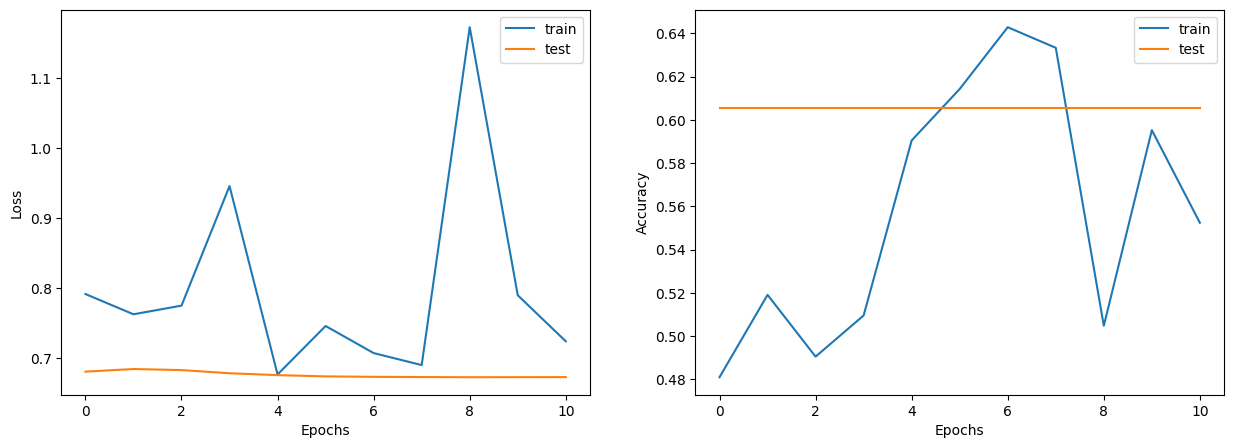

In [ ]:
display_learning_curves(history)

In [ ]:
x_test = test_data.Article_number.to_numpy()
print(x_test)
_, test_accuracy = gnn_model.evaluate(x=x_test, y=y_test, verbose=0)
print(f"Test accuracy: {round(test_accuracy * 100, 2)}%")

[8 8 8 9 9 9 9 2 8 9 9 8 9 8 9 2 2 8 8 9 9 8 8 2 8 9 2 8 8 8 8 9 8 8 9 9 8
 8 2 8 8 9 2 9 2 8 9 8 9 9 2 8 9 8 9 8 2 9 9 8 8 8 2 9 8 8 9 8 8 8 9 9 9 9
 8 2]
Test accuracy: 57.89%


In [ ]:
logits = gnn_model.predict(tf.convert_to_tensor(x_test))
print(logits)
#probabilities = keras.activations.softmax(tf.convert_to_tensor(logits)).numpy()
#print(probabilities)

#display_class_probabilities(probabilities)

node_repesentations (324, 32)
aggregated_messages (324, 32)
node_repesentations (324, 32)
aggregated_messages (324, 32)
Tensor("gnn_model/postprocess/dense_11/Gelu/mul_1:0", shape=(324, 32), dtype=float32)
3/3 [==============================] - 1s 12ms/step
[[0.4734882 ]
 [0.4734882 ]
 [0.4734882 ]
 [0.47059208]
 [0.47059208]
 [0.47059208]
 [0.47059208]
 [0.45471692]
 [0.4734882 ]
 [0.47059208]
 [0.47059208]
 [0.4734882 ]
 [0.47059208]
 [0.4734882 ]
 [0.47059208]
 [0.45471692]
 [0.45471692]
 [0.4734882 ]
 [0.4734882 ]
 [0.47059208]
 [0.47059208]
 [0.4734882 ]
 [0.4734882 ]
 [0.45471692]
 [0.4734882 ]
 [0.47059208]
 [0.45471692]
 [0.4734882 ]
 [0.4734882 ]
 [0.4734882 ]
 [0.4734882 ]
 [0.47059208]
 [0.4734882 ]
 [0.4734882 ]
 [0.47059208]
 [0.47059208]
 [0.4734882 ]
 [0.4734882 ]
 [0.45471692]
 [0.4734882 ]
 [0.4734882 ]
 [0.47059208]
 [0.45471692]
 [0.47059208]
 [0.45471692]
 [0.4734882 ]
 [0.47059208]
 [0.4734882 ]
 [0.47059208]
 [0.47059208]
 [0.45471692]
 [0.4734882 ]
 [0.47059208]


In [ ]:
test_data

,Article_number,id,term_0,term_1,term_2,term_3,term_4,term_5,term_6,term_7,...,term_559,term_560,term_561,term_562,term_563,term_564,term_565,term_566,term_567,Label
294,8,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
268,8,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
281,8,21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
308,9,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
310,9,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,9,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
313,9,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
296,9,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
267,8,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [ ]:
len(test_data)

76

In [ ]:
threshold = 0.46
binary_labels=(logits>threshold).astype(int)
print(binary_labels)

[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]]


In [ ]:
len(binary_labels)

76

In [ ]:
# Print article number, corresponding ID, and binary labels
for article_number, article_id, label in zip(test_data['Article_number'], test_data['id'], binary_labels):
    print(f"Article Number: {article_number}, ID: {article_id}, Binary Labels: {label}")

Article Number: 8, ID: 34, Binary Labels: [1]
Article Number: 8, ID: 8, Binary Labels: [1]
Article Number: 8, ID: 21, Binary Labels: [1]
Article Number: 9, ID: 13, Binary Labels: [1]
Article Number: 9, ID: 15, Binary Labels: [1]
Article Number: 9, ID: 10, Binary Labels: [1]
Article Number: 9, ID: 9, Binary Labels: [1]
Article Number: 2, ID: 4, Binary Labels: [0]
Article Number: 8, ID: 19, Binary Labels: [1]
Article Number: 9, ID: 11, Binary Labels: [1]
Article Number: 9, ID: 3, Binary Labels: [1]
Article Number: 8, ID: 16, Binary Labels: [1]
Article Number: 9, ID: 12, Binary Labels: [1]
Article Number: 8, ID: 32, Binary Labels: [1]
Article Number: 9, ID: 16, Binary Labels: [1]
Article Number: 2, ID: 6, Binary Labels: [0]
Article Number: 2, ID: 0, Binary Labels: [0]
Article Number: 8, ID: 15, Binary Labels: [1]
Article Number: 8, ID: 3, Binary Labels: [1]
Article Number: 9, ID: 6, Binary Labels: [1]
Article Number: 9, ID: 27, Binary Labels: [1]
Article Number: 8, ID: 0, Binary Labels: [

In [ ]:
# Create a DataFrame to hold the information
result_df = pd.DataFrame({
    'Article_number': test_data['Article_number'],
    'Id': test_data['id'],
    'Binary_labels': binary_labels.flatten()
})

# Print the DataFrame
print(result_df)

     Article_number  Id  Binary_labels
294               8  34              1
268               8   8              1
281               8  21              1
308               9  13              1
310               9  15              1
..              ...  ..            ...
302               9   7              1
313               9  18              1
296               9   1              1
267               8   7              1
79                2   2              0

[76 rows x 3 columns]


In [ ]:
# Predict probabilities for each class
#probabilities = keras.activations.softmax(tf.convert_to_tensor(logits)).numpy()

# Initialize a dictionary to store sentences for each class label
class_sentences = {label: [] for label in range(len(binary_labels))}

# Associate each sentence with its predicted class label
for idx, label in enumerate(binary_labels):
    # Ensure label is scalar
    label = int(label)
    class_sentences[label].append(data['Sentence'].iloc[idx])

# Select sentences with class label 1
selected_sentences = class_sentences[1]

# Print selected sentences
for sentence in selected_sentences:
    print(sentence)

শ্রীহরিকোটা: ভারতের মহাকাশ বিজ্ঞানে আজ এক দারুণ গর্বের দিন৷ আজই হবে চন্দ্রায়ন ৩-র মহাকাশে উৎক্ষেপন৷ ভারতীয় স্পেস রিসার্চ অর্গানাইজেশন (ISRO) -র এটি তৃতীয় বড়সড় প্রজেক্ট৷ শুক্রবার দুপুর ২-৩৫ এ উৎক্ষেপনের সময়৷ ভারতের সবচেয়ে শক্তিশালী রকেটthe Launch Vehicle Mark III (LVM3) যাকে গাইসোক্রোনাস লঞ্চ ভেহিকেল মার্ক ৩ -ও বলা হয় তাই বয়ে নিয়ে যাবে চন্দ্রযান ৩ কে৷ শ্রীহরিকোটার সতীশ ধাওয়ান স্পেস সেন্টার থেকে এই উৎক্ষেপনের কাজ হবে৷%%%%চন্দ্রযান ৩ -র উৎক্ষেপণের পুরো বিষয়টি অফিসিয়াল ওয়েবসাইট এবং ইসরো-র ইউটিউব চ্যানেলেও এই বিষয়টি লাইভে দেখা যাবে৷ পাশাপাশি ডিডি ন্যাশানাল চ্যানেলেও এই উৎক্ষেপণ লাইভ দেখা যাবে৷%%%%%%%%চন্দ্রযান -৩ -এ ল্যান্ডার
রোভার এবং একটি প্রোপালশন মডিউল রয়ছে৷ যার ওজন ৩৯০০ কেজি৷ প্রোপালশন মডিউলের ওজন ২১৪৮ কেজি৷ ল্যান্ডার মডিউলটি ১৭৫২ কেজি ওজনের৷ চাঁদের কক্ষের ১০০ কিমিতে প্রপালশন মডিউল ল্যান্ডারকে বহন করে নিয়ে যাবে৷%%%%আরও পড়ুন &amp;;Weather Alert: বঙ্গোপসাগরে নতুন সাইক্লোনিক সার্কুলেশন তৈরির সম্ভাবনা
আবহাওয়ার বড় তোলপাড়ের ইঙ্গিত কি%%%%%%%%রোভারের ওজন ২৬ কিলো
যা চন্দ্রয

<ipython-input-63-b8641991b783>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label = int(label)


In [ ]:
len(selected_sentences)

64

In [ ]:
# Predict probabilities for each class
#probabilities = keras.activations.softmax(tf.convert_to_tensor(logits)).numpy()

# Initialize a list to store sentences with class label 1 and their corresponding article numbers
selected_sentences = []

# Associate each sentence with its predicted class label and article number
for idx, (sentence, article_number) in enumerate(zip(data['Sentence'], test_data['Article_number'])):
    label = binary_labels[idx]
    if label == 1:
        selected_sentences.append((sentence, article_number))

# Print selected sentences with their corresponding article numbers
for sentence, article_number in selected_sentences:
    print(f"Article Number: {article_number}, Sentence: {sentence}")

Article Number: 8, Sentence: শ্রীহরিকোটা: ভারতের মহাকাশ বিজ্ঞানে আজ এক দারুণ গর্বের দিন৷ আজই হবে চন্দ্রায়ন ৩-র মহাকাশে উৎক্ষেপন৷ ভারতীয় স্পেস রিসার্চ অর্গানাইজেশন (ISRO) -র এটি তৃতীয় বড়সড় প্রজেক্ট৷ শুক্রবার দুপুর ২-৩৫ এ উৎক্ষেপনের সময়৷ ভারতের সবচেয়ে শক্তিশালী রকেটthe Launch Vehicle Mark III (LVM3) যাকে গাইসোক্রোনাস লঞ্চ ভেহিকেল মার্ক ৩ -ও বলা হয় তাই বয়ে নিয়ে যাবে চন্দ্রযান ৩ কে৷ শ্রীহরিকোটার সতীশ ধাওয়ান স্পেস সেন্টার থেকে এই উৎক্ষেপনের কাজ হবে৷%%%%চন্দ্রযান ৩ -র উৎক্ষেপণের পুরো বিষয়টি অফিসিয়াল ওয়েবসাইট এবং ইসরো-র ইউটিউব চ্যানেলেও এই বিষয়টি লাইভে দেখা যাবে৷ পাশাপাশি ডিডি ন্যাশানাল চ্যানেলেও এই উৎক্ষেপণ লাইভ দেখা যাবে৷%%%%%%%%চন্দ্রযান -৩ -এ ল্যান্ডার
Article Number: 8, Sentence: রোভার এবং একটি প্রোপালশন মডিউল রয়ছে৷ যার ওজন ৩৯০০ কেজি৷ প্রোপালশন মডিউলের ওজন ২১৪৮ কেজি৷ ল্যান্ডার মডিউলটি ১৭৫২ কেজি ওজনের৷ চাঁদের কক্ষের ১০০ কিমিতে প্রপালশন মডিউল ল্যান্ডারকে বহন করে নিয়ে যাবে৷%%%%আরও পড়ুন &amp;;Weather Alert: বঙ্গোপসাগরে নতুন সাইক্লোনিক সার্কুলেশন তৈরির সম্ভাবনা
Article Numbe

In [ ]:
# Initialize a dictionary to store sentences for each article number
article_sentences = {}

# Associate each sentence with its article number
for sentence, article_number in selected_sentences:
    if article_number not in article_sentences:
        article_sentences[article_number] = []
    article_sentences[article_number].append(sentence)

# Convert the lists of sentences into paragraphs for each article
for article_number, sentences in article_sentences.items():
    article_paragraph = ', '.join(sentences)
    print(f"Article Number: {article_number}\nParagraph:\n{article_paragraph}\n")


Article Number: 8
Paragraph:
শ্রীহরিকোটা: ভারতের মহাকাশ বিজ্ঞানে আজ এক দারুণ গর্বের দিন৷ আজই হবে চন্দ্রায়ন ৩-র মহাকাশে উৎক্ষেপন৷ ভারতীয় স্পেস রিসার্চ অর্গানাইজেশন (ISRO) -র এটি তৃতীয় বড়সড় প্রজেক্ট৷ শুক্রবার দুপুর ২-৩৫ এ উৎক্ষেপনের সময়৷ ভারতের সবচেয়ে শক্তিশালী রকেটthe Launch Vehicle Mark III (LVM3) যাকে গাইসোক্রোনাস লঞ্চ ভেহিকেল মার্ক ৩ -ও বলা হয় তাই বয়ে নিয়ে যাবে চন্দ্রযান ৩ কে৷ শ্রীহরিকোটার সতীশ ধাওয়ান স্পেস সেন্টার থেকে এই উৎক্ষেপনের কাজ হবে৷%%%%চন্দ্রযান ৩ -র উৎক্ষেপণের পুরো বিষয়টি অফিসিয়াল ওয়েবসাইট এবং ইসরো-র ইউটিউব চ্যানেলেও এই বিষয়টি লাইভে দেখা যাবে৷ পাশাপাশি ডিডি ন্যাশানাল চ্যানেলেও এই উৎক্ষেপণ লাইভ দেখা যাবে৷%%%%%%%%চন্দ্রযান -৩ -এ ল্যান্ডার, রোভার এবং একটি প্রোপালশন মডিউল রয়ছে৷ যার ওজন ৩৯০০ কেজি৷ প্রোপালশন মডিউলের ওজন ২১৪৮ কেজি৷ ল্যান্ডার মডিউলটি ১৭৫২ কেজি ওজনের৷ চাঁদের কক্ষের ১০০ কিমিতে প্রপালশন মডিউল ল্যান্ডারকে বহন করে নিয়ে যাবে৷%%%%আরও পড়ুন &amp;;Weather Alert: বঙ্গোপসাগরে নতুন সাইক্লোনিক সার্কুলেশন তৈরির সম্ভাবনা, আবহাওয়ার বড় তোলপাড়ের ইঙ্গিত কি%%%%%%%

In [ ]:
article_paragraph

'যা চন্দ্রযান ২-র প্রজ্ঞান রোভারের সমান ওজনের৷ কিন্তু এতে ল্যান্ডিংয়ের সময়ে সুরক্ষার বিষয়ে বাড়তি জোর দেওয়া হয়েছে৷%%%% %%%%প্রপালশন মডিউল থেকে ৭৫৮ ওয়াট পাওয়ার জেনারেট হবে৷ ল্যান্ডার মডিউল থেকে ৭৩৮ ওয়াট, রোভারে হবে ৫০ ওয়াট৷%%%%চন্দ্রায়ন -৩, ভারতের চাঁদে তৃতীয় অভিযান, চাঁদে ২৩-২৪ তারিখে এটি ল্যান্ড করবে৷ এস সোমনাথ ইন্ডিয়ান স্পেস রিসার্চ অর্গানাইজেশন -র প্রধান জানিয়েছিলেন ২০২৩-র ১৪ জুলাই এই লঞ্চ হবে৷%%%%পিটিআই ও এএনআই কে দেওয়া সাক্ষাৎকারে ইসরোর প্রাক্তন প্রধান কে শিভন জানিয়েছেন চন্দ্রযান ৩ -র কাজ হবে চাঁদের জিওলজি এবং পৃথিবীর উদ্ভবের বিষয়ে নানা বিষয়ে জানার জন্য৷ চন্দ্রযান ২-র বিফল হওয়ার পর এবার স্পেস অর্গানাইজেশন আরও বেশি সতর্ক৷ চাঁদে অবতরণের সময়ে যেন কোনও গণ্ডগোল না হয় তা নিয়েই সতর্ক৷একটি বিশেষ সাইটেই ল্যান্ড করবে চন্দ্রযান ৩৷%%%%, মগরাহাটে তৃণমূল নেতা খুনের ঘটনাতেও বিস্ফোরক দাবি তুললেন শুভেন্দু, একইসঙ্গে মুখ খুললেন বিজেপির দলীয় পদ নিয়েও, &amp;;মৃত্যু দুঃখজনক, খুন করেছে সেলিম লস্করের ডান হাত, পুলিশ কিছু করবে না তখনই এই ধরনের কাঙ্খিত নয় এমন ঘটনা ঘটে, ভারতের গণতান্ত্র

In [ ]:
article_paragraph='''শ্রীহরিকোটা: ভারতের মহাকাশ বিজ্ঞানে আজ এক দারুণ গর্বের দিন৷ আজই হবে চন্দ্রায়ন ৩-র মহাকাশে উৎক্ষেপন৷ ভারতীয় স্পেস রিসার্চ অর্গানাইজেশন (ISRO) -র এটি তৃতীয় বড়সড় প্রজেক্ট৷ শুক্রবার দুপুর ২-৩৫ এ উৎক্ষেপনের সময়৷ ভারতের সবচেয়ে শক্তিশালী রকেটthe Launch Vehicle Mark III (LVM3) যাকে গাইসোক্রোনাস লঞ্চ ভেহিকেল মার্ক ৩ -ও বলা হয় তাই বয়ে নিয়ে যাবে চন্দ্রযান ৩ কে৷ শ্রীহরিকোটার সতীশ ধাওয়ান স্পেস সেন্টার থেকে এই উৎক্ষেপনের কাজ হবে৷%%%%চন্দ্রযান ৩ -র উৎক্ষেপণের পুরো বিষয়টি অফিসিয়াল ওয়েবসাইট এবং ইসরো-র ইউটিউব চ্যানেলেও এই বিষয়টি লাইভে দেখা যাবে৷ পাশাপাশি ডিডি ন্যাশানাল চ্যানেলেও এই উৎক্ষেপণ লাইভ দেখা যাবে৷%%%%%%%%চন্দ্রযান -৩ -এ ল্যান্ডার'''

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Minor Project/fromLabeled/bengali_train.csv')
# Fetching the 8th article
article_0 = df.iloc[0]
print(article_0['Article'])

শ্রীহরিকোটা:  ভারতের মহাকাশ বিজ্ঞানে আজ এক দারুণ গর্বের দিন৷ আজই হবে  চন্দ্রায়ন ৩-র মহাকাশে উৎক্ষেপন৷ ভারতীয় স্পেস রিসার্চ অর্গানাইজেশন   (ISRO) -র এটি তৃতীয় বড়সড় প্রজেক্ট৷ শুক্রবার দুপুর ২-৩৫ এ উৎক্ষেপনের সময়৷ ভারতের সবচেয়ে শক্তিশালী রকেট the Launch Vehicle Mark III (LVM3) যাকে গাইসোক্রোনাস লঞ্চ ভেহিকেল মার্ক ৩ -ও বলা হয় তাই বয়ে নিয়ে যাবে চন্দ্রযান ৩ কে৷ শ্রীহরিকোটার সতীশ ধাওয়ান স্পেস সেন্টার থেকে এই উৎক্ষেপনের কাজ হবে৷%%%%চন্দ্রযান ৩ -র উৎক্ষেপণের পুরো বিষয়টি অফিসিয়াল ওয়েবসাইট এবং ইসরো-র ইউটিউব চ্যানেলেও এই বিষয়টি লাইভে দেখা যাবে৷ পাশাপাশি ডিডি ন্যাশানাল চ্যানেলেও এই উৎক্ষেপণ লাইভ দেখা যাবে৷%%%%%%%%চন্দ্রযান -৩ -এ ল্যান্ডার, রোভার এবং একটি প্রোপালশন মডিউল রয়ছে৷ যার ওজন ৩৯০০ কেজি৷ প্রোপালশন মডিউলের ওজন ২১৪৮ কেজি৷ ল্যান্ডার মডিউলটি ১৭৫২ কেজি ওজনের৷  চাঁদের কক্ষের ১০০ কিমিতে প্রপালশন মডিউল ল্যান্ডারকে বহন করে নিয়ে যাবে৷%%%%আরও পড়ুন &amp;#8211;  Weather Alert: বঙ্গোপসাগরে নতুন সাইক্লোনিক সার্কুলেশন তৈরির সম্ভাবনা, আবহাওয়ার বড় তোলপাড়ের ইঙ্গিত কি%%%%%%%%রোভারের ওজন ২৬ 

In [ ]:
summary_article_0=article_0['Summary']
summary_article_0

"Chandrayaan-3: আজ কখন, কোথা থেকে উৎক্ষেপণ, ভারতের গর্বের নতুন মিশনের সব তথ্য এক ক্লিকে chandrayaan 3 launch: Know when and whre to watch live updates of isro chandrayaan 3 countdown begins india's moon mission, this time scientists are more cautious"

In [ ]:
pip install rouge-score


  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=8629081476dba47ac69ca1e432c4c92424088e08d1baa202338da098272f8746
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score


In [ ]:
pip install evaluate


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 25.9 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [ ]:
pip install rouge


In [ ]:
!pip install rouge


In [ ]:
from nltk.translate.bleu_score import corpus_bleu
from nltk.translate.bleu_score import SmoothingFunction
from rouge import Rouge

# Example generated summaries and actual summaries
#generated_summaries = ["This is a summary.", "Another summary here."]
#actual_summaries = ["This is the actual summary.", "This is another actual summary."]

# Initialize Rouge
rouge = Rouge()

# Calculate Rouge scores
scores = rouge.get_scores(article_paragraph, summary_article_0, avg=True)

print("ROUGE-1 Precision:", scores['rouge-1']['p'])
print("ROUGE-1 Recall:", scores['rouge-1']['r'])
print("ROUGE-1 F1 Score:", scores['rouge-1']['f'])
print("ROUGE-2 Precision:", scores['rouge-2']['p'])
print("ROUGE-2 Recall:", scores['rouge-2']['r'])
print("ROUGE-2 F1 Score:", scores['rouge-2']['f'])
print("ROUGE-L Precision:", scores['rouge-l']['p'])
print("ROUGE-L Recall:", scores['rouge-l']['r'])
print("ROUGE-L F1 Score:", scores['rouge-l']['f'])


ROUGE-1 Precision: 0.060240963855421686
ROUGE-1 Recall: 0.13157894736842105
ROUGE-1 F1 Score: 0.0826446237907249
ROUGE-2 Precision: 0.0
ROUGE-2 Recall: 0.0
ROUGE-2 F1 Score: 0.0
ROUGE-L Precision: 0.024096385542168676
ROUGE-L Recall: 0.05263157894736842
ROUGE-L F1 Score: 0.03305784693122111


In [ ]:
from rouge_score import rouge_scorer

def calculate_rouge_scores(reference, hypothesis):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    scores = scorer.score(reference, hypothesis)
    return scores

# Example usage:
##reference_text = "The quick brown fox jumps over the lazy dog."
#hypothesis_text = "A quick brown fox jumps over a lazy dog."
rouge_scores = calculate_rouge_scores(article_paragraph, summary_article_0)

print("ROUGE-1:", rouge_scores['rouge1'])
print("ROUGE-2:", rouge_scores['rouge2'])
print("ROUGE-L:", rouge_scores['rougeL'])


ROUGE-1: Score(precision=0.06896551724137931, recall=0.2857142857142857, fmeasure=0.1111111111111111)
ROUGE-2: Score(precision=0.0, recall=0.0, fmeasure=0.0)
ROUGE-L: Score(precision=0.034482758620689655, recall=0.14285714285714285, fmeasure=0.05555555555555555)
